In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Modeling Complex Data Densities

In the last chapter, we showed that classification with generative models is based on building simple probability models. In particular, we construct class-conditional probability distributions $P(x|w=k)$ over the observed data $x$ for each value of the world state $w$. In Chapter 3, we introduced several probability distributions that could be used for this purpose, but these were quite limited in scope. For example, it is not realistic to assume that all the complexities of visual data are well described by the normal distribution.

In this chapter, we demonstrate how to construct complex probability density functions from elementary ones using the concept of a hidden variable. As a representative problem, we consider face detection; we observe a $60 \times 60$ RGB image patch and want to decide whether it contains a face or not. To this end, we concatenate the RGB values to form the $10800 \times 1$ vector $x$. Our goal is to take the vector $x$ and return a label $w \in \{0, 1\}$ indicating whether it contains background ($w = 0$) or a face ($w = 1$). In a real face detection system, we would repeat this procedure for every possible sub-window of an image (Figure 7.1).

We will start with a basic generative approach in which we describe the likelihood of the data in the presence/absence of a face with a normal distribution. We will then extend this model to address its weaknesses. We emphasize that state-of-the-art face detection algorithms are not based on generative methods such as these; they are usually tackled using the discriminative methods of Chapter 9. This application was selected for purely pedagogical reasons.

## 1 Normal Classification Model

We will take a generative approach to face detection; we will model the probability of the data $x$ and parameterize it by the world state $w$. We will describe the data with a multivariate normal distribution such that:

$$
P(x|w) = \mathcal{N}(x \mid \mu_w, \Sigma_w)
$$

Alternatively, treating the two possible values of the state $w$ separately, we can explicitly write:

$$
\begin{align*}
P(x|w=0) &= \mathcal{N}(x \mid \mu_0, \Sigma_0) \\
P(x|w=1) &= \mathcal{N}(x \mid \mu_1, \Sigma_1)
\end{align*}
$$

These expressions are examples of class-conditional density functions. They describe the density of the data $x$ conditional on the value of the world state $w$.


# Face Detection

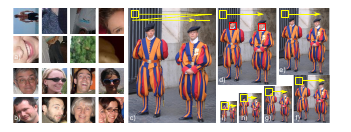
Fig.1 Face detection. Consider examining a small window of the image (here 60 × 60). We concatenate the RGB values in the window to make a data vector x of dimension 10800 × 1. The goal of face detection is to infer a label w ∈ {0, 1} indicating whether the window contains (a) a background region (w = 0) or (b) an aligned face (w = 1). (c-i) We repeat this operation at every position and scale in the image by sweeping a ﬁxed size window through a stack of resized images, estimating w at every point.


### Fig.1: Face Detection
Consider examining a small window of the image (e.g., $60 \times 60$). We concatenate the RGB values in the window to make a data vector $\mathbf{x}$ of dimension $10800 \times 1$.  

The goal of face detection is to infer a label $w \in \{0, 1\}$ indicating whether the window contains:  
- $w = 0$: a **background region**, or  
- $w = 1$: an **aligned face**.  

---

### Sliding Window and Scale
To perform detection across the entire image:  
1. We repeat this operation at every position and scale in the image.  
2. A fixed-size window is swept through a stack of resized images, estimating \(w\) at every point.

---

### Class Conditional Density Functions
The probability density $P(\mathbf{x} | w)$ is modeled as a Gaussian distribution:  

$$
P(\mathbf{x} | w) = \mathcal{N}_{\mathbf{x}} [\boldsymbol{\mu}_w, \boldsymbol{\Sigma}_w]
$$

Specifically, for the two possible values of \(w\):  

$$
P(\mathbf{x} | w = 0) = \mathcal{N}_{\mathbf{x}} [\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0]
$$  

$$
P(\mathbf{x} | w = 1) = \mathcal{N}_{\mathbf{x}} [\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1]
$$  

These are examples of **class conditional density functions**, describing the density of data $\mathbf{x}$ conditional on the world state $w$.

---

### Parameter Estimation
The goal of learning is to estimate the parameters:  

$$
\theta = \{\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0, \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1\}
$$  

from example pairs of training data $\{(\mathbf{x}_i, w_i)\}_{i=1}^I$.  

#### Learning for Background ($w = 0$)  
Parameters $\boldsymbol{\mu}_0$ and $\boldsymbol{\Sigma}_0$ are learned from the subset of training data $S_0$ that corresponds to background regions $(w = 0$). Using the maximum likelihood estimation (MLE):  

$$
\hat{\boldsymbol{\mu}}_0, \hat{\boldsymbol{\Sigma}}_0 = \arg\max_{\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0} \prod_{i \in S_0} P(\mathbf{x}_i | \boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)
$$  

Expanding with the Gaussian model:  

$$
\hat{\boldsymbol{\mu}}_0, \hat{\boldsymbol{\Sigma}}_0 = \arg\max_{\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0} \prod_{i \in S_0} \mathcal{N}_{\mathbf{x}_i} [\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0]
$$  

#### Learning for Faces $(w = 1$)  
Similarly, parameters $\boldsymbol{\mu}_1$ and $\boldsymbol{\Sigma}_1$ are learned from the subset $S_1$ of training data containing faces ($w = 1$).

---

### Fig.2
(TODO: Add figure content or visualization here)
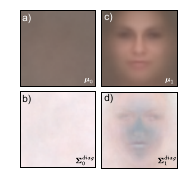

Fig.2 Class conditional density functions for normal model with diag- onal covariance. Maximum likelihood ﬁts based on 1000 training examples per class. a) Mean for background data µ0 (reshaped from 10800 × 1 vec- tor to 60 × 60 RGB image). b) Re- shaped square root of diagonal co- variance for background data Σ0 . c) Mean for face data µ1 d) Covariance for face data Σ1 . The background model has little structure: the mean is uniform and the variance is high ev- erywhere. The mean of the face model clearly captures class-speciﬁc informa- tion. The covariance of the face is larger at the edges of the image, which usually contain hair or background.


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

# Step 1: Generate synthetic training data
def generate_data(n_samples=1000, dim=10800):
    # Background data (w = 0)
    mu0 = np.zeros(dim)
    sigma0 = np.eye(dim) * 0.5
    x0 = np.random.multivariate_normal(mu0, sigma0, size=n_samples // 2)

    # Face data (w = 1)
    mu1 = np.ones(dim) * 0.5
    sigma1 = np.eye(dim) * 0.2
    x1 = np.random.multivariate_normal(mu1, sigma1, size=n_samples // 2)

    # Combine data
    x = np.vstack((x0, x1))
    w = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))  # Labels
    return x, w, mu0, sigma0, mu1, sigma1

# Step 2: Estimate parameters using Maximum Likelihood Estimation (MLE)
def estimate_parameters(x, w):
    # Separate data by class
    x0 = x[w == 0]
    x1 = x[w == 1]

    # Compute MLE for each class
    mu0 = np.mean(x0, axis=0)
    sigma0 = np.cov(x0, rowvar=False)
    mu1 = np.mean(x1, axis=0)
    sigma1 = np.cov(x1, rowvar=False)

    return mu0, sigma0, mu1, sigma1

# Step 3: Classify a given window using Gaussian distributions
def classify_window(x, mu0, sigma0, mu1, sigma1):
    # Compute likelihood for each class
    p_x_given_0 = multivariate_normal.pdf(x, mean=mu0, cov=sigma0)
    p_x_given_1 = multivariate_normal.pdf(x, mean=mu1, cov=sigma1)

    # Assign label based on maximum likelihood
    return 0 if p_x_given_0 > p_x_given_1 else 1

# Step 4: Perform sliding window classification
def sliding_window_classification(image, window_size, mu0, sigma0, mu1, sigma1):
    rows, cols, _ = image.shape
    results = np.zeros((rows - window_size, cols - window_size))

    for i in range(0, rows - window_size):
        for j in range(0, cols - window_size):
            # Extract window and flatten
            window = image[i:i + window_size, j:j + window_size].flatten()
            # Classify window
            results[i, j] = classify_window(window, mu0, sigma0, mu1, sigma1)
    
    return results

# Step 5: Example usage
if __name__ == "__main__":
    # Generate synthetic data
    x, w, true_mu0, true_sigma0, true_mu1, true_sigma1 = generate_data()

    # Estimate parameters
    est_mu0, est_sigma0, est_mu1, est_sigma1 = estimate_parameters(x, w)

    # Simulate a small grayscale image (e.g., 100x100)
    image = np.random.rand(100, 100, 3)  # Random image for demonstration

    # Perform sliding window classification
    window_size = 60
    results = sliding_window_classification(image, window_size, est_mu0, est_sigma0, est_mu1, est_sigma1)

    print("Classification Results Shape:", results.shape)


In [ ]:
import random
import math

# Step 1: Generate synthetic training data
def generate_data(n_samples=1000, dim=10):
    def generate_gaussian(mean, variance, n_samples, dim):
        return [
            [random.gauss(mean, math.sqrt(variance)) for _ in range(dim)]
            for _ in range(n_samples)
        ]

    # Background data (w = 0)
    x0 = generate_gaussian(mean=0, variance=0.5, n_samples=n_samples // 2, dim=dim)

    # Face data (w = 1)
    x1 = generate_gaussian(mean=0.5, variance=0.2, n_samples=n_samples // 2, dim=dim)

    # Combine data
    x = x0 + x1
    w = [0] * (n_samples // 2) + [1] * (n_samples // 2)
    return x, w

# Step 2: Estimate mean and covariance (MLE)
def mean_and_covariance(data):
    # Compute mean
    dim = len(data[0])
    mean = [sum(row[i] for row in data) / len(data) for i in range(dim)]

    # Compute covariance
    covariance = [[0] * dim for _ in range(dim)]
    for i in range(dim):
        for j in range(dim):
            covariance[i][j] = (
                sum((row[i] - mean[i]) * (row[j] - mean[j]) for row in data) / len(data)
            )
    return mean, covariance

# Step 3: Multivariate Gaussian density function
def gaussian_pdf(x, mean, covariance):
    dim = len(mean)

    # Determinant and inverse of covariance matrix
    determinant = 1
    inverse = [[0] * dim for _ in range(dim)]
    for i in range(dim):
        determinant *= covariance[i][i]
        inverse[i][i] = 1 / covariance[i][i]

    # Compute Mahalanobis distance
    diff = [x[i] - mean[i] for i in range(dim)]
    mahalanobis = sum(
        diff[i] * inverse[i][i] * diff[i] for i in range(dim)
    )

    # Compute Gaussian density
    normalization = (2 * math.pi) ** (-dim / 2) * (determinant ** -0.5)
    return normalization * math.exp(-0.5 * mahalanobis)

# Step 4: Classify a given window
def classify_window(x, mean0, cov0, mean1, cov1):
    p_x_given_0 = gaussian_pdf(x, mean0, cov0)
    p_x_given_1 = gaussian_pdf(x, mean1, cov1)
    return 0 if p_x_given_0 > p_x_given_1 else 1

# Step 5: Perform sliding window classification
def sliding_window_classification(image, window_size, mean0, cov0, mean1, cov1):
    rows, cols = len(image), len(image[0])
    results = [[0] * (cols - window_size) for _ in range(rows - window_size)]

    for i in range(rows - window_size):
        for j in range(cols - window_size):
            # Extract window and flatten
            window = [
                image[i + wi][j + wj] for wi in range(window_size) for wj in range(window_size)
            ]
            # Classify window
            results[i][j] = classify_window(window, mean0, cov0, mean1, cov1)

    return results

# Step 6: Example usage
if __name__ == "__main__":
    # Generate synthetic data
    x, w = generate_data(n_samples=100, dim=10)

    # Separate data by class
    x0 = [x[i] for i in range(len(x)) if w[i] == 0]
    x1 = [x[i] for i in range(len(x)) if w[i] == 1]

    # Estimate parameters
    mean0, cov0 = mean_and_covariance(x0)
    mean1, cov1 = mean_and_covariance(x1)

    # Simulate a small grayscale image (e.g., 10x10)
    image = [[random.random() for _ in range(10)] for _ in range(10)]

    # Perform sliding window classification
    window_size = 3
    results = sliding_window_classification(image, window_size, mean0, cov0, mean1, cov1)

    print("Classification Results:")
    for row in results:
        print(row)
